# Autoencoders in Keras

* [Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)
* [A Tutorial on Deep Learning PDF](http://ai.stanford.edu/~quocle/tutorial2.pdf)

In [66]:
%pylab inline
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

from keras.utils.visualize_util import plot as keras_plot
from IPython.display import SVG, Image
from keras.utils.visualize_util import model_to_dot

Populating the interactive namespace from numpy and matplotlib


### Data 

In [74]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = train_x.astype('float32')
train_y = train_y.astype('float32')
test_x = test_x.astype('float32')
test_y = test_y.astype('float32')

print('Train x Shape:', train_x.shape)
print('Train y Shape:', train_y.shape)
print('Test x Shape:', test_x.shape)
print('Test y Shape:', test_y.shape)

Train x Shape: (60000, 28, 28)
Train y Shape: (60000,)
Test x Shape: (10000, 28, 28)
Test y Shape: (10000,)


### Autoencoder Model

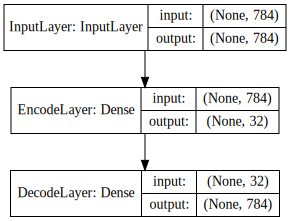

In [68]:
encoding_dim = 32  

input_img = Input(shape=(784,), name='InputLayer')
encoded = Dense(output_dim=encoding_dim, activation='relu', name='EncodeLayer')(input_img)
decoded = Dense(784, activation='sigmoid', name='DecodeLayer')(encoded)

# Input -> Recontruction
autoencoder = Model(input=input_img, output=decoded)

# Visualization
SVG(model_to_dot(autoencoder, show_shapes=True).create(prog='dot', format='svg'))

### Encoder Model

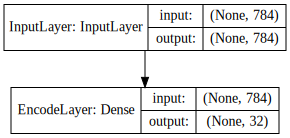

In [63]:
# Input Image -> Encoded 
encoder = Model(input=input_img, output=encoded, name='Input2')
SVG(model_to_dot(encoder, show_shapes=True).create(prog='dot', format='svg'))

### Decoder Model

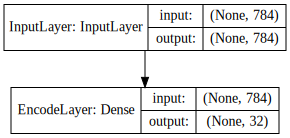

In [65]:
encoded_input = Input(shape=(encoding_dim,), name='Input3')
decoded_layer = autoencoder.layers[-1] # 마지막 layer를 꺼내옴
decoder = Model(input=encoded_input, output=decoded_layer(encoded_input))
SVG(model_to_dot(encoder, show_shapes=True).create(prog='dot', format='svg'))

### Training